# CM3070 Final Project, Modelling

```
University of London
BSc Computer Science
CM3070, Final Project
Hudson Leonardo MENDES
hlm12@student.london.ac.uk
```

## 1. Introduction

The ERC model we aspire to develop is fundamentally a multi-modal machine learning model, absorbing and processing a diverse range of data types including textual, visual, and audio inputs. To achieve this, we employ state-of-the-art techniques such as Natural Language Processing (NLP) for text, Convolutional Neural Networks (CNNs) for visual data, and a spectrum of audio processing tools for sound. The resulting system will be a versatile model capable of identifying and classifying emotional states in a variety of real-world contexts.

As machine learning practitioners, we appreciate the importance of adhering to structured, proven workflows that provide a road map for complex projects, guiding us through the essential steps from data acquisition to model evaluation and deployment. Chollet's workflow, also known as "Universal Machine Learning Workflow"[4] provides us with this roadmap, establishing an effective and efficient framework for our ERC development endeavor.

To ensure the success of our venture, we will leverage the custom-built `hlm12erc` library, specifically designed to streamline data manipulation, model training, evaluation and serving procedures for this project. The rigorous processes embedded in this library will ensure high-quality data preparation, essential to robust model training. Each step of the way, we will adhere to the best practices in machine learning engineering, from employing thorough testing procedures to ensuring reproducibility. Join us on this journey as we explore, innovate, and strive to advance the frontiers of emotion recognition technology.


## 2. Environment

In this section of our project, we delve into the technical groundwork, outlining the strategic structuring of our dependencies and initializing key system configurations that will be leveraged throughout the ensuing stages.

At the heart of this setup is the setup.cfg file, which enumerates our project's dependencies and facilitates the seamless installation of our custom-built **`hlm12erc`** library. Leveraging the `-e` option for pip, we unlock dynamic editing capabilities for the library's codebase without necessitating repeated reinstallation.

To optimize our system, we've crafted different sets of dependencies for each critical task, including `etl`, `eda`, `modelling`, `training`, and `serving`, allowing us to avoid redundant installations in environments where certain packages aren't needed.

Alongside this, we initialise critical paths that remain pivotal across training, experimentation, and evaluation phases. We also establish specific log levels and configure Jupyter's `auto-reload` mechanisms, empowering us with real-time updates and valuable debugging insights.

### 2.1. Dependencies

In [1]:
!cat ../setup.cfg

[metadata]
name = hlm12erc
version = attr: hlm12erc.VERSION
author = Hudson Mendes
author_email = hlm12@student.london.ac.uk
description = Final Project from University of London
long_description = file: README.md, LICENSE
keywords = university-of-london
license = copyright

[options]
zip_safe = False
include_package_data = True
packages = find:
package_dir =
    =src
python_requires = >=3.10
install_requires =
    torch>=2.0.1
    torchtext>=0.15.2
    torchvision>=0.15.2
    transformers>=4.30.2
    nltk>=3.8.1
    Pillow>=10.0.0
    scikit-learn>=1.3.0

[options.package_data]

[options.extras_require]
# development
dev =
    pre-commit>=3.3.3
    black[jupyter]>=23.7.0
    isort>=5.12.0

test =
    pytest>=7.4.0

# mlops
etl =
    # extract, transformation & loading
    kaggle>=1.5.13
    tqdm>=4.65.0
    pandas>=2.0.1
    google-cloud-storage>=2.10.0
    moviepy>=1.0.3

eda =
    # exploratory data analysis, and model design
    gensim
    tensorflow
    tensorflow-hub
    torch
  

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging

logging.basicConfig(level=logging.INFO)

### 2.2. Paths & Locations

In [4]:
import pathlib

dir_data = pathlib.Path("../data")

## 3. Defining the Problem

Emotion Recognition in Conversations (ERC) refers to the process of recognizing and analyzing emotions in interactive dialogues. It presents a unique set of challenges given the fact that the same words or phrases could convey different emotions depending on the context and flow of the conversation. This task is further complicated when applied in non-dyadic settings, where multiple participants engage in a dialogue. This makes ERC a complex problem within the realm of machine learning and artificial intelligence, where context modelling and emotional shifts among interlocutors are difficult to address accurately.

Despite its complexity, ERC has garnered significant interest owing to its vast applications in opinion mining over social media threads, chat history, and other online platforms. The ability to accurately discern emotions in conversations can have profound implications for various industries, making any advancements in this field potentially groundbreaking. However, given the sparsity of the solution space and the high variability in model architecture, ERC remains a largely unexplored area with many potential paths for future research and experimentation.

### 3.2. Multi-Party Setting Challenge

Multi-party conversations present an inherent set of challenges when it comes to emotion recognition (ERC). In a dialogue involving multiple participants, the context, conversation flow, and emotional shifts become considerably more intricate to decipher. The utterances in multi-party dialogues can express a wide range of emotions based on the context, making the task of accurate emotion recognition more arduous. This problem of contextual modeling and accounting for emotion shifts among multiple interlocutors remains a significant challenge in ERC. Additionally, the complex dynamics of multi-party conversations and the interdependence of individual emotional states further complicate the task.

The multi-modality of ERC data also poses another layer of challenge in multi-party settings. As emotions can only be detected through human actions such as textual utterances, visual gestures, and acoustic signals in the absence of physiological indications, the need for effectively dealing with multi-modal data becomes crucial. While some models focus on exploring this multi-modality, others resort to using a single modality, usually textual, thereby ignoring valuable insights that could be gleaned from other modalities. Consequently, the architectural variations in the existing models, coupled with the largely unexplored solution space, underscore the daunting challenges of emotion recognition in multi-party settings.

### 3.3. Multi-modality Challenge

The multifaceted challenge of Emotion Recognition in Conversations (ERC) is magnified by the multi-modal nature of the data involved. ERC data typically consist of multiple modalities, such as textual utterances, visual cues, and acoustic signals. Accurately detecting emotions from these varied sources is complex, as they can individually or collectively contribute to the overall emotional context. This complexity is amplified by the high-dimensionality of the data, particularly in video and audio modalities. This high-dimensional data is both difficult to investigate and expensive to compute, posing significant challenges in data handling, processing, and analysis.

Furthermore, the computation and training of multi-modal models are exceptionally resource-intensive. Each modality may require distinct computational approaches and algorithms for processing and analyzing the data, increasing the overall computational load. Training such models also necessitates substantial computational power and time, often leading to increased costs and resource allocation. These factors, combined with the diverse architectures proposed to model ERC, contribute to the intricate and computationally demanding nature of emotion recognition. Despite the high costs and complexity, the vast potential applications of accurate ERC underscore the importance of ongoing research in this challenging, yet highly rewarding, field of machine learning.

## 4. Assembling the DataSet

This section of the document focuses on assembling the final dataset that will be used for training and evaluating machine learning models. This involves performing ETL (Extract, Transform, Load) operations on the raw MELD data[1, 2] to prepare it for modeling. ETL is a process used to extract data from various sources, transform it into a format that is suitable for analysis, and load it into a target database or data warehouse. In this section, the raw data is extracted from various sources, transformed into a format that can be used for modeling, and loaded into a Pandas DataFrame.

The code in this section is responsible for assembling the final dataset by combining the preprocessed text, audio, and visual features for each example. The `hlm12erc` library is used to load the preprocessed features for each example and combine them into a single DataFrame. This library was created specifically for this project to simplify the notebook code by abstracting the ETL complexity into a simple, well-tested library that could be re-utilized and scheduled if needed. The library was designed with full unit-test coverage to ensure that the data is loaded and combined correctly. The resulting DataFrame contains the preprocessed features for each example, as well as the corresponding label, which will be used for training and evaluating the machine learning models.

### 4.1. Installing ETL Dependencies



In [5]:
%%capture
%pip install -e '..[etl]'

### 4.2. Running ETL

In [6]:
from hlm12erc.etl import ETL, KaggleDataset

ds_kaggle = KaggleDataset(owner="zaber666", name="meld-dataset", subdir="MELD-RAW/MELD.Raw")
etl = ETL(dataset=ds_kaggle).into(uri_or_folderpath=dir_data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:hlm12erc.etl:Kaggle dataset: zaber666/meld-dataset
INFO:hlm12erc.etl:Workspace set to: /tmp/hlm12erc/etl
INFO:hlm12erc.etl:Dataset already loaded into ../data, skipping (use force=True to force re-load).


### 4.3. Previewing Data Loaded

In [7]:
!ls {str(dir_data)} | head -n 10

d-0-seq-0.png
d-0-seq-0.wav
d-0-seq-1.png
d-0-seq-1.wav
d-0-seq-10.png
d-0-seq-10.wav
d-0-seq-11.png
d-0-seq-11.wav
d-0-seq-12.png
d-0-seq-12.wav


In [8]:
import pandas as pd

df_raw = pd.read_csv(dir_data / "train.csv", index_col=0)
df_raw

,dialogue,sequence,speaker,x_text,x_visual,x_audio,label
0,0,0,Chandler,also I was the point person on my companys tr...,d-0-seq-0.png,d-0-seq-0.wav,neutral
1,0,1,The Interviewer,You mustve had your hands full.,d-0-seq-1.png,d-0-seq-1.wav,neutral
2,0,2,Chandler,That I did. That I did.,d-0-seq-2.png,d-0-seq-2.wav,neutral
3,0,3,The Interviewer,So lets talk a little bit about your duties.,d-0-seq-3.png,d-0-seq-3.wav,neutral
4,0,4,Chandler,My duties? All right.,d-0-seq-4.png,d-0-seq-4.wav,surprise
...,...,...,...,...,...,...,...
9984,1038,13,Chandler,You or me?,d-1038-seq-13.png,d-1038-seq-13.wav,neutral
9985,1038,14,Ross,"I got it. Uh, Joey, women don't have Adam's ap...",d-1038-seq-14.png,d-1038-seq-14.wav,neutral
9986,1038,15,Joey,"You guys are messing with me, right?",d-1038-seq-15.png,d-1038-seq-15.wav,surprise
9987,1038,16,All,Yeah.,d-1038-seq-16.png,d-1038-seq-16.wav,neutral


Speaker,Text,Image,Audio,Emotion
Phoebe,I got no sleep last night!,,,anger
Ross,Thanks a lot.,,,anger
Phoebe,"No, I can't talk to you! I don't have a fancy ad in the Yellow Pages!",,,anger
Monica,I-I cannot spend another evening with that man.,,,disgust
Chandler,"Youre going to a clinic, and a pyjama store!",,,disgust
Chandler,Nobody is gonna be staring at the bride when the father of the groom is wearing a back-less dress.,,,disgust
Rachel,Oh God.,,,fear
Joshua,They-they-they can smell fear.,,,fear
Phoebe,She is gonna hate me.,,,fear
Joey,Then all the lying and the secrets would finally be over!,,,joy

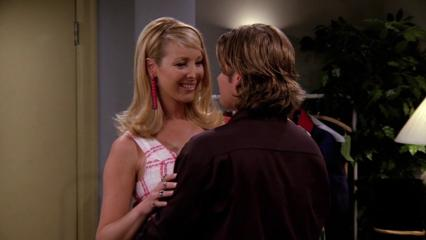
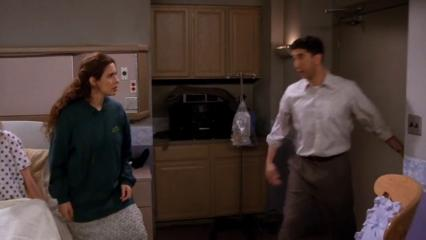
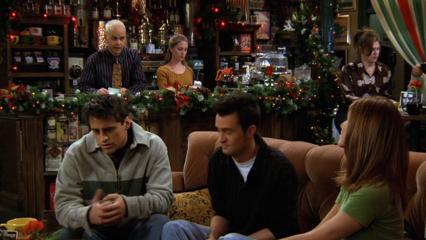
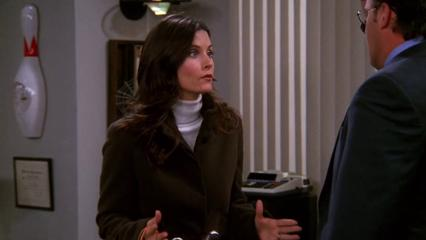
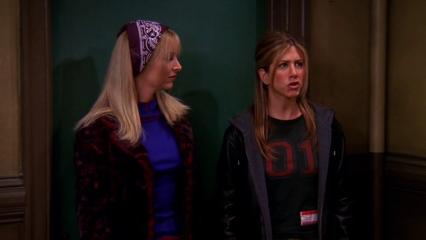
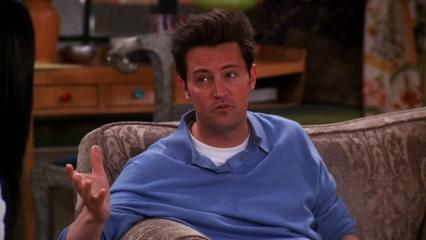
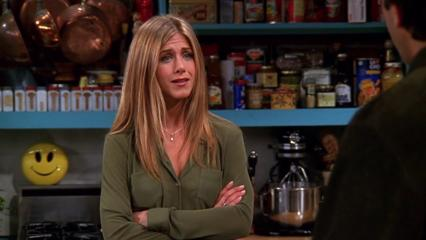
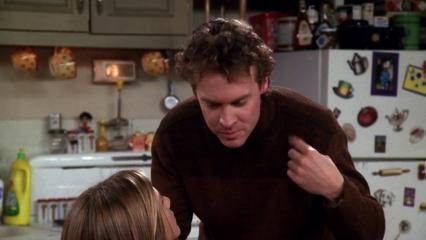
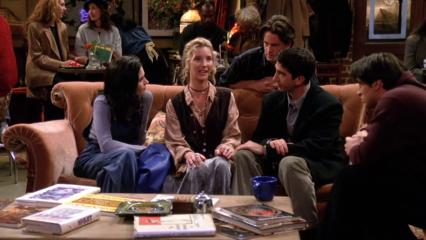
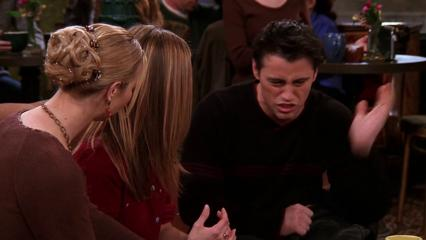
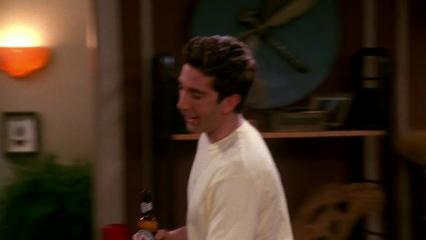
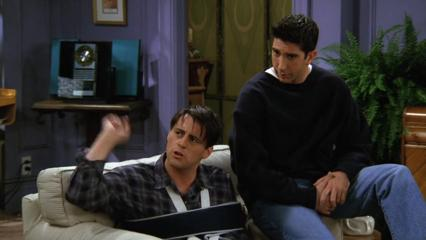
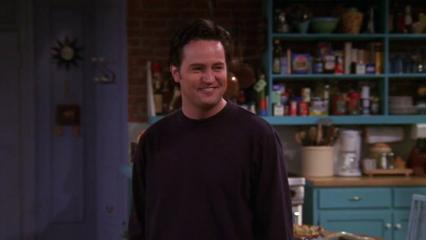
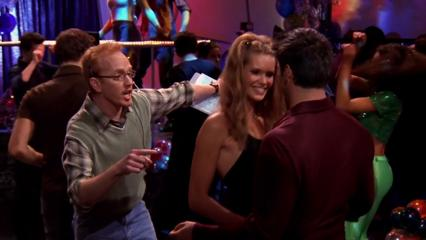
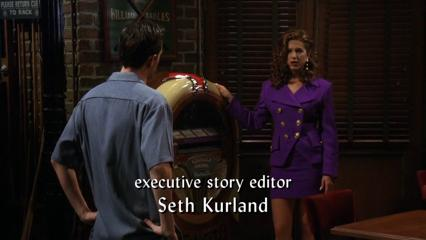
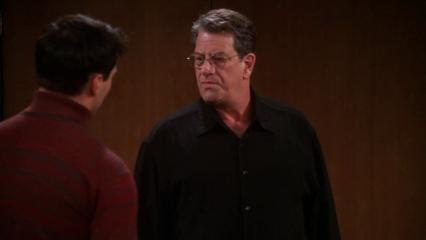
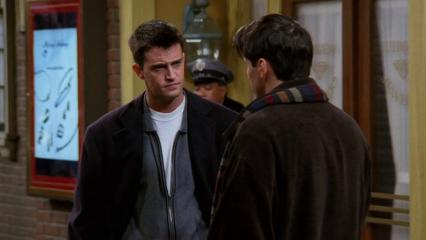
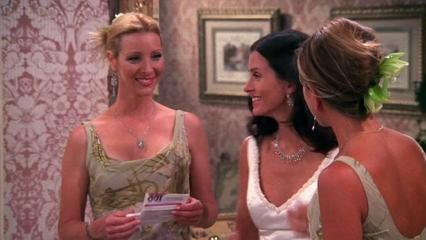
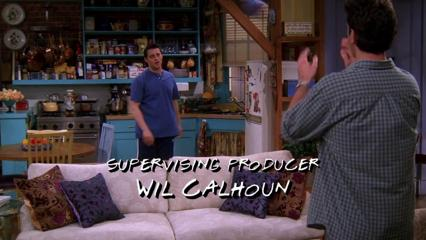
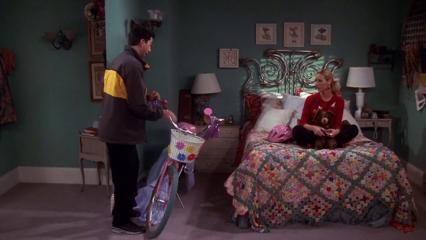
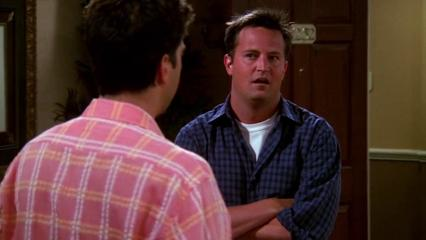

In [9]:
import io
import base64
from IPython.display import display, HTML
from PIL import Image

df_sample = df_raw.groupby(["label"], group_keys=False).apply(lambda x: x.sample(min(len(x), 3)))
df_sample = df_sample.sort_values(["label"])

table_rows = []
for i, row in df_sample.iterrows():
    speaker_cell = f'<td>{row["speaker"]}</td>'
    text_cell = f'<td>{row["x_text"]}</td>'
    image_path = dir_data / row["x_visual"]
    with Image.open(image_path) as img:
        width, height = img.size
        crop_top = height // 2 - height // 10
        crop_bottom = height // 2 + height // 10
        img_cropped = img.crop((0, crop_top, width, crop_bottom))
        buffer = io.BytesIO()
        img_cropped.save(buffer, format="JPEG")
        image_data = base64.b64encode(buffer.getvalue()).decode()
    image_cell = f'<td><img src="data:image/jpeg;base64,{image_data}" width="100"></td>'
    audio_cell = f'<td><audio controls src="{dir_data / row["x_audio"]}" /></td>'
    label_cell = f'<td>{row["label"]}</td>'
    table_rows.append(f"<tr>{speaker_cell}{text_cell}{image_cell}{audio_cell}{label_cell}</tr>")

table_html = (
    "<table><tr><th>Speaker</th><th>Text</th><th>Image</th><th>Audio</th><th>Emotion</th></tr>"
    + "".join(table_rows)
    + "</table>"
)
display(HTML(table_html))


## 5. Choosing the Metric of Success

The chosen metric of success for the **HLM12ERC** project, as outlined in the document, is **`Accuracy`**, in the form it's calculated by the `scikit-learn` library[3].

The document establishes the criteria for comparative success between different approaches,
such as Advanced Textual Embeddings, based on their ability to achieve superior Accuracy
scores over the MELD Test Split. This choice clearly aligns with the principles described
by Francois Chollet in "Choosing the Metric of Success"[4], where the selection of a suitable
metric is vital for effectively guiding the optimization of machine learning models and for
a fair comparative analysis of different methods.

In addition, the document introduces the use of a Grid Search methodology, with the Ray
library built into the HuggingFace framework, for the optimization of model architecture
and hyperparameters. This ensures the exploration of a comprehensive hyperparameter space,
inclusive of both continuous and categorical options, for the fine-tuning of the Final Model.
This aligns with Chollet's guidance that the choice of the right metric of success can often
depend on specific architectural decisions and the hyperparameters used in the model.


## 6. Deciding on the Evaluation Protocol

The evaluation protocol for the **HLM12ERC** project adopts the **`Hold Out Test-set`** approach, 
a decision influenced by the structure of the MELD Dataset and the constraints 
imposed by its size and multimodal nature. This dataset comes pre-divided into three 
splits: `train``, `dev``, and `test``, which directly supports the implementation of the 
Hold Out approach.

The choice of this protocol is further justified due to the impracticability of using 
methods like K-Fold Cross Validation, stemming from the significant computational 
demands of the MELD dataset. In addition, the Hold Out Test-set approach serves as the 
evaluation standard for both individual components (Objectives 1 to 6) and the final 
model (Objective 7), ensuring consistent assessment throughout the development 
process.

## 7. Preparing your Data

## 8. Model Selection

### 8.1. Developping the Baseline Model

### 8.2. Overfitting Model

### 8.3. Tuned & Regularised Model

## 9. Final Evaluation

## 10. Conclusions

## 11. References

[1] Soujanya Poria, Devamanyu Hazarika, Navonil Majumder, Gautam Naik, Erik Cambria, and Rada Mihalcea. 2019. MELD: A Multimodal Multi-Party Dataset for Emotion Recognition in Conversations. In Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics, Association for Computational Linguistics, Florence, Italy, 527–536. DOI:https://doi.org/10.18653/v1/P19-1050

[2] Chao-Chun Hsu, Sheng-Yeh Chen, Chuan-Chun Kuo, Ting-Hao Huang, and Lun-Wei Ku. 2018. EmotionLines: An Emotion Corpus of Multi-Party Conversations. In Proceedings of the Eleventh International Conference on Language Resources and Evaluation (LREC 2018), European Language Resources Association (ELRA), Miyazaki, Japan. Retrieved from https://aclanthology.org/L18-1252

[3] F. Pedregosa, G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel, M. Blondel, P. Prettenhofer, R. Weiss, V. Dubourg, J. Vanderplas, A. Passos, D. Cournapeau, M. Brucher, M. Perrot, and E. Duchesnay. 2011. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research 12, (2011), 2825–2830.

[4] Francois Chollet. 2017. Deep Learning with Python (1st ed.), Manning Publications Co., USA.